### Coincidence system

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.mplot3d import Axes3D
import scipy
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import scipy.ndimage as ndimage
import re

# This ensures visualizations are plotted inside the notebook
%matplotlib inline

In [2]:
import numpy as np; np.random.seed(0)
import matplotlib.pyplot as plt
import matplotlib.ticker

class OOMFormatter(matplotlib.ticker.ScalarFormatter):
    def __init__(self, order=0, fformat="%1.1f", offset=True, mathText=True):
        self.oom = order
        self.fformat = fformat
        matplotlib.ticker.ScalarFormatter.__init__(self,useOffset=offset,useMathText=mathText)
    def _set_orderOfMagnitude(self, nothing):
        self.orderOfMagnitude = self.oom
    def _set_format(self, vmin, vmax):
        self.format = self.fformat
        if self._useMathText:
            self.format = '$%s$' % matplotlib.ticker._mathdefault(self.format)

In [3]:
def pixel_map (data):
    
    nBars = 30
    N = len(data)
    hits = []
    matrix = np.zeros((nBars,nBars))
    sum_columns = np.zeros(nBars)
    sum_rows = np.zeros(nBars)

    sum_cl1 = 0
    sum_cl2 = 0
    sum_cl3 = 0

    sum_rw1 = 0
    sum_rw2 = 0
    sum_rw3 = 0

    Eventos = 0

    for k in range (N):

        columns = np.concatenate((data[k,0:27], data[k,29:32]), axis=0)
        rows = np.concatenate((data[k,32:35], data[k,37:64]), axis=0)

        if (np.sum(columns) == 1):    # Condición de activación de una barra por capa horizontal
            if (np.sum(rows) == 1):   # Condición de activación de una barra por capa vertical

                Eventos += 1
                hits.append(data[k,:])

                for i in range(nBars):   # Rows
                    for j in range(nBars):  # Columns

                        matrix[i,j]= matrix[i,j] + rows[i]*columns[j]

        #if (np.sum(columns) == 1):    # Condición de activación de una barra por capa horizontal
        #    if (np.sum(rows) == 1):   # Condición de activación de una barra por capa vertical

         #       Eventos += 1

    matrix = np.fliplr(matrix)  # Matrix reordering

    print 'Numero de eventos = ' + str(Eventos)
    print 'SNR = ' + str(100*Eventos/float(N))
    
    # 2D histogram plot
    
    fig = plt.figure(figsize=(35, 8))
    ax = fig.add_subplot(131)
    ax.set_xlabel('Columns', fontsize = 25)
    ax.set_ylabel('Rows', fontsize = 25)

    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.invert_yaxis()
    im = plt.imshow(matrix, interpolation='nearest', origin='low')

    ax.invert_yaxis()
    ax.xaxis.tick_top()

    # Color bar
    clb = plt.colorbar()
    clb.set_label('Hits', fontsize = 25)
    clb.ax.tick_params(labelsize = 20)
    
    # Increase tick labels
    ax.tick_params(axis='both', which='major', labelsize=25)
    
    # Channels histogram

    hist = np.sum(hits, axis=0)
    hist = np.concatenate((hist[0:27], hist[29:35], hist[37:64]), axis=None)
    mean = np.mean(hist)
    std = np.std(hist)
    chs = np.linspace(0, 59, num=60)
    
    fig = plt.figure(figsize=(15, 5))
    plt.bar(chs, hist, alpha=0.5)
    plt.plot(hist, 'ok')
    #plt.axhline(y=mean, color='k', lw=2, ls='--')
    plt.axvline(x=30, color='r', lw=2)
    plt.text(12, 1100, "x bars", fontsize=20)
    plt.text(42, 1100, "y bars", fontsize=20)
    plt.text(50, 1100, "$\mu$ = "+str(np.round(mean,1)), fontsize=20)
    plt.text(50, 1000, "$\sigma$ = "+ str(np.round(std,1)), fontsize=20)
    plt.xlabel('Channel', fontsize = 25)
    plt.ylabel('Counts', fontsize = 25)
    plt.grid()

    return matrix

In [4]:
def pixel_map_gray (data):
    
    nBars = 30
    N = len(data)
    hits = []
    matrix = np.zeros((nBars,nBars))
    sum_columns = np.zeros(nBars)
    sum_rows = np.zeros(nBars)

    sum_cl1 = 0
    sum_cl2 = 0
    sum_cl3 = 0

    sum_rw1 = 0
    sum_rw2 = 0
    sum_rw3 = 0

    Eventos = 0

    for k in range (N):

        columns = np.concatenate((data[k,0:27], data[k,29:32]), axis=0)
        rows = np.concatenate((data[k,32:35], data[k,37:64]), axis=0)

        if (np.sum(columns) == 1):    # Condición de activación de una barra por capa horizontal
            if (np.sum(rows) == 1):   # Condición de activación de una barra por capa vertical

                Eventos += 1
                hits.append(data[k,:])

                for i in range(nBars):   # Rows
                    for j in range(nBars):  # Columns

                        matrix[i,j]= matrix[i,j] + rows[i]*columns[j]

        #if (np.sum(columns) == 1):    # Condición de activación de una barra por capa horizontal
        #    if (np.sum(rows) == 1):   # Condición de activación de una barra por capa vertical

         #       Eventos += 1

    matrix = np.fliplr(matrix)  # Matrix reordering

    print 'Numero de eventos = ' + str(Eventos)
    print 'SNR = ' + str(100*Eventos/float(N))
    
    # 2D histogram plot
    
    fig = plt.figure(figsize=(35, 8))
    ax = fig.add_subplot(131)
    ax.set_xlabel('Hit position in y [cm]', fontsize = 20)
    ax.set_ylabel('Hit position in z [cm]', fontsize = 20)

    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.invert_yaxis()
    im = plt.imshow(matrix/np.max(matrix), interpolation='nearest', origin='low', cmap=plt.cm.gray, extent=[0,120,0,120])

    #ax.invert_yaxis()
    #ax.xaxis.tick_top()

    # Color bar
    clb = plt.colorbar()
    #clb.set_label('Hits', fontsize = 25)
    clb.ax.tick_params(labelsize = 15)
    
    # Increase tick labels
    ax.tick_params(axis='both', which='major', labelsize=15)
    
    # Channels histogram

    hist = np.sum(hits, axis=0)
    hist = np.concatenate((hist[0:27], hist[29:35], hist[37:64]), axis=None)
    mean = np.mean(hist)
    std = np.std(hist)
    chs = np.linspace(0, 59, num=60)
    
    fig = plt.figure(figsize=(15, 5))
    plt.bar(chs, hist, alpha=0.5)
    plt.plot(hist, 'ok')
    #plt.axhline(y=mean, color='k', lw=2, ls='--')
    plt.axvline(x=30, color='r', lw=2)
    plt.text(12, 1100, "x bars", fontsize=20)
    plt.text(42, 1100, "y bars", fontsize=20)
    plt.text(50, 1100, "$\mu$ = "+str(np.round(mean,1)), fontsize=20)
    plt.text(50, 1000, "$\sigma$ = "+ str(np.round(std,1)), fontsize=20)
    plt.xlabel('Channel', fontsize = 25)
    plt.ylabel('Counts', fontsize = 25)
    plt.grid()

    return matrix

Line to filter the segmentation fault errors

for i in {00..23};do sed -i '/$$/d' ./MuTe_P2_2019_01_30h$i.dat; echo $i;done

In [5]:
data = np.loadtxt('MuTe_P1_2019_02_20h13.dat','string', comments='#')
N = len(data)
print ('Pulsos = ' + str(N))

Pulsos = 132470


In [7]:
# Extract the events from the data

n_Chann = 64
events = np.zeros((N,n_Chann))

for i in range(N):

    x=(" ".join(data[i][4]))
    lin=map(int ,x.split(' '))
    if len(lin) == n_Chann:  # Lines with legth greater than 64
        events[i,:]=lin
    else:
        print ("Line : ") + str(i)

In [13]:
hist = np.sum(events, axis=0)
chs = np.linspace(0, 63, num=64)

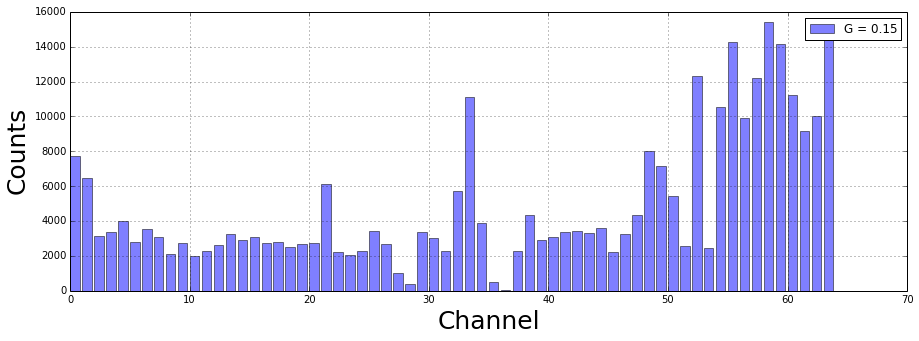

In [14]:
fig = plt.figure(figsize=(15, 5))
plt.bar(chs, hist, alpha=0.5)
plt.xlabel('Channel', fontsize = 25)
plt.ylabel('Counts', fontsize = 25)
plt.legend(["G = 0.15", "Calibrated"])
plt.grid()

Numero de eventos = 29394
SNR = 22.1891749075


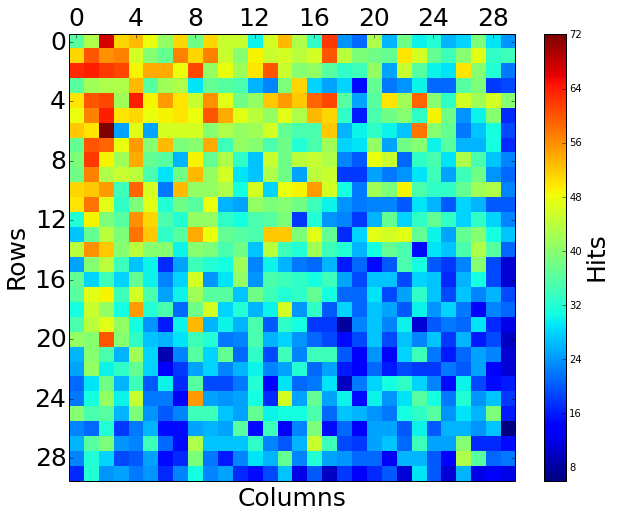

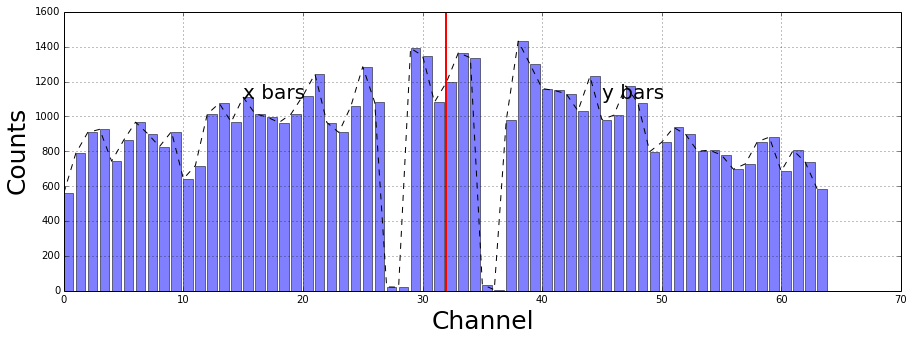

In [17]:
mat = pixel_map(events)

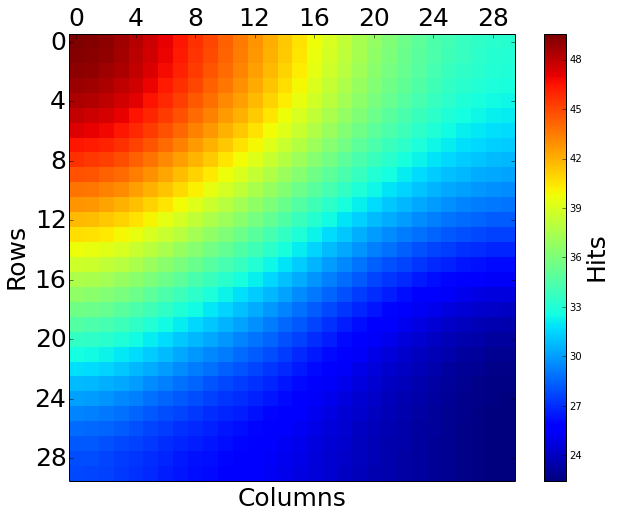

In [12]:
img = ndimage.gaussian_filter(mat, sigma=(5), order=0)

fig = plt.figure(figsize=(35, 8))
ax = fig.add_subplot(131)

plt.imshow(img, interpolation='nearest')
ax.set_xlabel('Columns', fontsize = 25)
ax.set_ylabel('Rows', fontsize = 25)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.invert_yaxis()
ax.invert_yaxis()
ax.xaxis.tick_top()

# Increase tick labels
ax.tick_params(axis='both', which='major', labelsize=25)

# Color bar
clb = plt.colorbar()
clb.set_label('Hits', fontsize = 25)

plt.show()

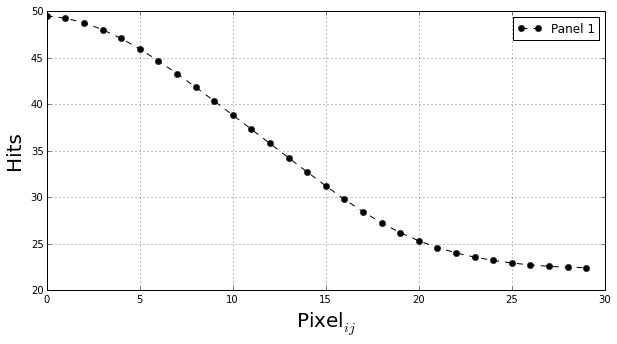

Atenuation percentage = 54.68 


In [13]:
diag = np.diagonal(img)

fig = plt.figure(figsize=(10, 5))
plt.plot(diag, '--ok')
plt.xlabel("Pixel$_{ij}$", fontsize = 20)
plt.ylabel("Hits", fontsize = 20)
plt.legend(["Panel 1", "Panle 2"], loc=1)
plt.grid()
plt.show()

print ("Atenuation percentage = %.2f " % ((np.max(diag) - np.min(diag))*100/np.max(diag)))

### Panel 2

In [4]:
data = np.loadtxt('MuTe_P2_2019_02_20h13.dat','string', comments='#')
N = len(data)
print ('Pulsos = ' + str(N))

Pulsos = 130523


In [5]:
# Extract the events from the data

events = np.zeros((N,64))

for i in range(N):

    x=(" ".join(data[i][4]))
    lin=map(int ,x.split(' '))
    if len(lin) == 64:
        events[i,:]=lin

In [6]:
hist = np.sum(events, axis=0)
chs = np.linspace(0, 63, num=64)

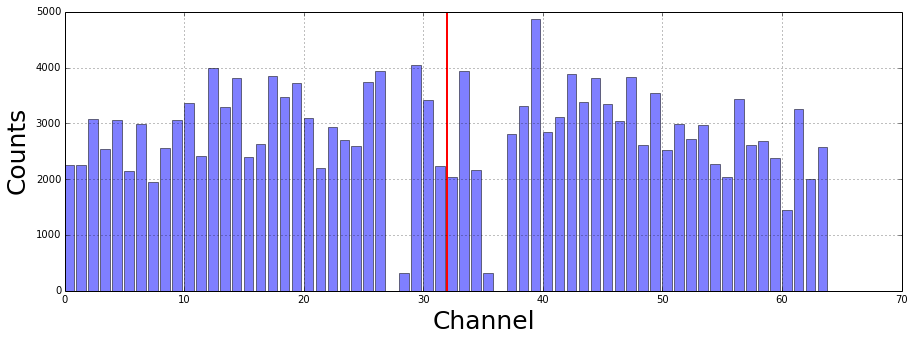

In [7]:
fig = plt.figure(figsize=(15, 5))
plt.bar(chs, hist, alpha=0.5)
plt.axvline(x=32, color='r', lw=2)
plt.xlabel('Channel', fontsize = 25)
plt.ylabel('Counts', fontsize = 25)
#plt.legend(["G = 0.15", "Calibrated"])
plt.grid()

Numero de eventos = 25088
SNR = 19.2211334401


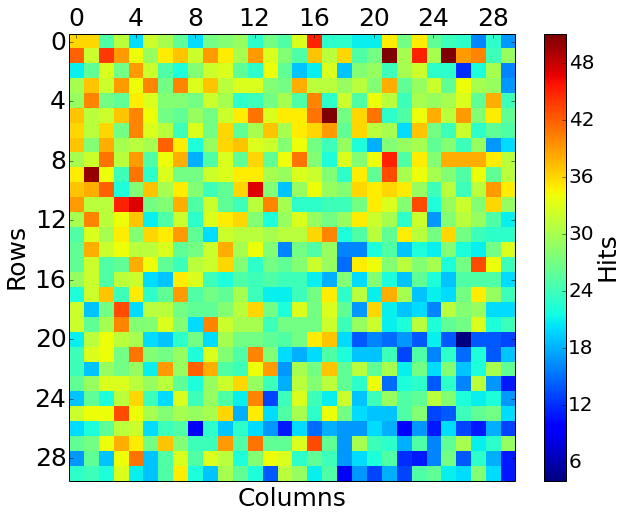

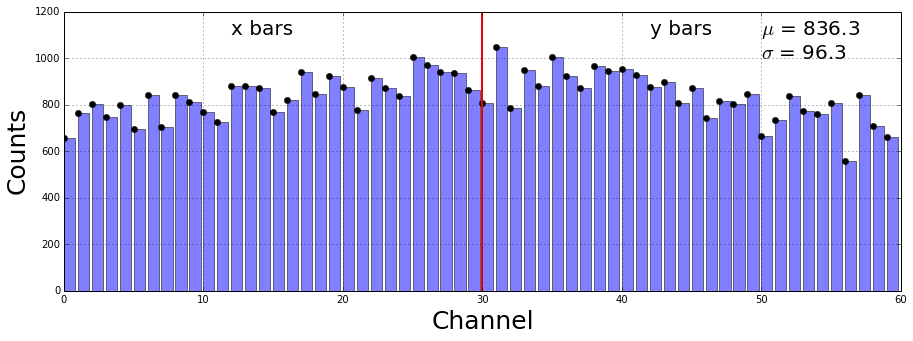

In [93]:
mat = pixel_map(events)

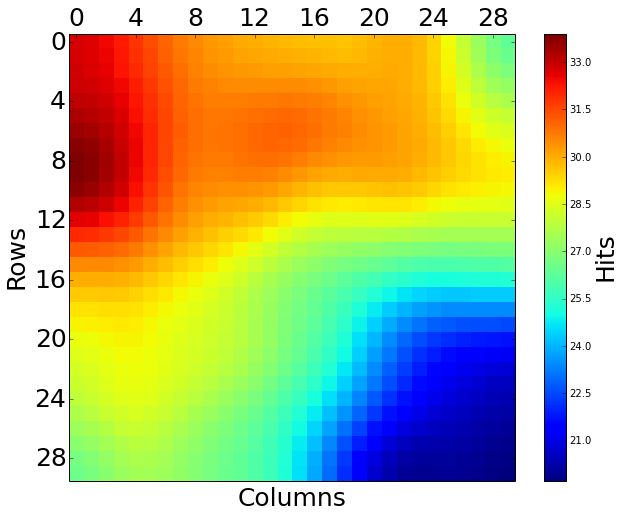

In [23]:
img = ndimage.gaussian_filter(mat, sigma=(3), order=0)

fig = plt.figure(figsize=(35, 8))
ax = fig.add_subplot(131)

plt.imshow(img, interpolation='nearest')
ax.set_xlabel('Columns', fontsize = 25)
ax.set_ylabel('Rows', fontsize = 25)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.invert_yaxis()
ax.invert_yaxis()
ax.xaxis.tick_top()

# Increase tick labels
ax.tick_params(axis='both', which='major', labelsize=25)

# Color bar
clb = plt.colorbar()
clb.set_label('Hits', fontsize = 25)

plt.show()

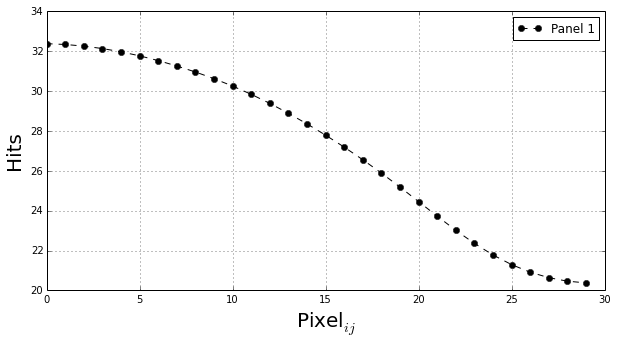

Atenuation percentage = 37.06 


In [30]:
diag = np.diagonal(img)

fig = plt.figure(figsize=(10, 5))
plt.plot(diag, '--ok')
plt.xlabel("Pixel$_{ij}$", fontsize = 20)
plt.ylabel("Hits", fontsize = 20)
plt.legend(["Panel 1", "Panle 2"], loc=1)
plt.grid()
plt.show()

print ("Atenuation percentage = %.2f " % ((np.max(diag) - np.min(diag))*100/np.max(diag)))

### Hodoscope coincidence

The first test was to measure the difference between the data recorded in both panels.

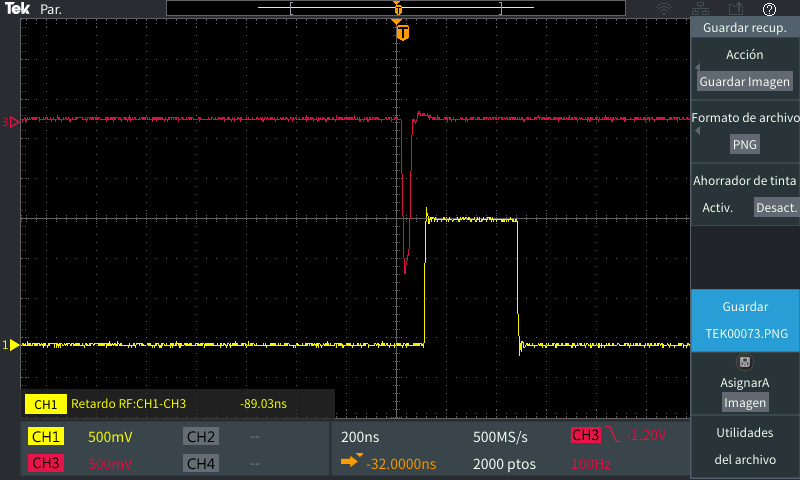

In [71]:
from IPython.display import Image
Image(filename='Figures/Emulador.PNG', width = 500)

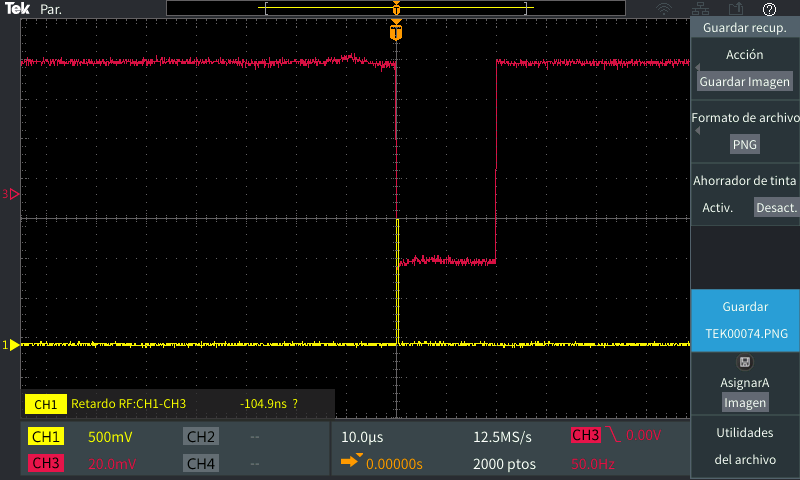

In [6]:
from IPython.display import Image
Image(filename='Figures/Generador.PNG', width = 500)

For the coincidence trigger we source the panels with the same signal in order to get a coincidence time and its standard deviation:

### Image creation

In [73]:
file_Panel_1 = 'MuTe_P1_2019_02_19h13.dat'
file_Panel_2 = 'MuTe_P2_2019_02_19h13.dat'

count = 0
for line in open(file_Panel_1).xreadlines(  ): count += 1

print ("Number of lines P1: ") + str(count)

count = 0
for line in open(file_Panel_2).xreadlines(  ): count += 1

print ("Number of lines P2: ") + str(count)

Number of lines P1: 146473
Number of lines P2: 144047


### Init time

In [74]:

with open(file_Panel_1) as f:
    i = 0;
    for line in f:
        
        if line[0] == '#':
            if line[2] == 's':
                init_Time1 = int(line[4:15])
                L1 = i
                print "Time P1 : " + str(init_Time1) + " Line : " + str(L1)
                break
        i+= 1
                
with open(file_Panel_2) as f:
    i = 0
    for line in f:
        if line[0] == '#':
            if line[2] == 's':
                init_Time2 = int(line[4:15])
                L2 = i
                print "Time P2 : " + str(init_Time2) + " Line : " + str(L2)
                break
        i += 1

Time P1 : 1550581201 Line : 54
Time P2 : 1550581201 Line : 54


### Tree data creation

In [75]:
with open(file_Panel_1) as P1:
    
    p1_Dic={}
    array = []
    for line in P1:
        
        if line[0] != '#':
            array.append(line)
        
        
        if line[0] == '#':
            if line[2] == 's':
                address = line[4:14]
                p1_Dic[address] = array
                array = []


with open(file_Panel_2) as P2:
    
    p2_Dic={}
    array = []
    for line in P2:
        
        if line[0] != '#':
            array.append(line)
        
        if line[0] == '#':
            if line[2] == 's':
                address = line[4:14]
                p2_Dic[address] = array
                array = []



### Matching matrices creation

In [63]:
def match(file, address, p1_mat, p2_mat, window):
    
    fine_Res = 25
    coarse_Res = 400
    counter = 0

    len_P1 = len(p1_mat)
    len_P2 = len(p2_mat)

    file.write("# s " + address + "\n")
    
    if len_P1 <= len_P2:
        file.write("# r " + str(len_P1) + "\n")
    else:
        file.write("# r " + str(len_P2) + "\n")
    
    for i in range (len_P1):
        line_P1 = re.split(r'\t+', p1_mat[i])
        time_P1 = int(line_P1[3])
        fine_P1 = int(line_P1[1])*fine_Res
        coarse_P1 = int(line_P1[2])*coarse_Res
        ToF_P1 = fine_P1 + coarse_P1
        
        for j in range (len_P2):
            line_P2 = re.split(r'\t+', p2_mat[j])
            time_P2 = int(line_P2[3])
            fine_P2 = int(line_P2[1])*fine_Res
            coarse_P2 = int(line_P2[2])*coarse_Res
            ToF_P2 = fine_P2 + coarse_P2
            
            av_ToF = (ToF_P1 + ToF_P2)/2.0
            error = np.absolute(time_P1-time_P2)
             
            if  error < window:
                #print "Time P1 = " + str(time_P1) + "  Time P2 = " + str(time_P2) + "  error = " + str(error)
                
                file.write(str(counter) + "\t" + str(time_P1) + "   \t" +  str(error) + "\t" + str(av_ToF)  + "\t" + line_P1[4][:-1] + "\t" + line_P2[4][:-1] + "\n")
                counter += 1


### Coincidence file creation

In [99]:
nevents_P1 = len(p1_Dic)
nevents_P2 = len(p2_Dic)

file = open("coincidence_19.dat", 'w')

window = 400
match_counter = 0

for i in range(3600):
    i+=1
    address_P1 = str(init_Time1 + i)
    address_P2 = str(init_Time1 + i+1)    # P2 time matching
    if p1_Dic.get(address_P1) != None:
            if p2_Dic.get(address_P2) != None:
                #print "Addresses: " + address_P1 + " " + address_P2
                p1_mat = p1_Dic[address_P1]
                p2_mat = p2_Dic[address_P2]
                match(file, address_P1, p1_mat, p2_mat, window)
                match_counter += 1

file.close() 

print "Seconds matched = " + str(match_counter)


NameError: name 'p1_Dic' is not defined

### Histogram generation 

In [18]:
nBars =  30         # Number of bars per axis
Nd = (2*nBars-1)    # Number of trajectories
C = nBars-1         # Shiffting index

matrix_P1 = np.zeros((nBars,nBars))
matrix_P2 = np.zeros((nBars,nBars))


matrix_ang = np.zeros((Nd,Nd))

sum_columns = np.zeros(nBars)
sum_rows = np.zeros(nBars)

sum_cl1 = 0
sum_cl2 = 0
sum_cl3 = 0

sum_rw1 = 0
sum_rw2 = 0
sum_rw3 = 0

evento = 0

with open('coincidence_MD.dat') as Hits:
    
    for line in Hits:
        if line[0] != '#' and line[0] != '\t' and line[0] != '\n':
        
            split_line = re.split(r'\t+', line)
            P1 = split_line[4]
            P2 = split_line[5]
            
            try:
                # Panel 1 
            
                columns_P1 = map(int ,(" ".join(P1[0:27] + P1[29:32])).split(' '))
                rows_P1 = map(int ,(" ".join(P1[32:35] + P1[37:64])).split(' '))
    
                # Panel 2 
    
                columns_P2 = map(int ,(" ".join(P2[0:27] + P2[29:32])).split(' '))
                rows_P2 = map(int ,(" ".join(P2[32:35] + P2[37:64])).split(' '))
            
    
                suma_P1_col = np.sum(columns_P1) 
                suma_P1_row =  np.sum(rows_P1)
                suma_P2_col =  np.sum(columns_P2)
                suma_P2_row =  np.sum(rows_P2)
    
                evento = evento + 1
            
            except ValueError as e:
                print "Error at event " + split_line[1] + "\n"
        
            if (suma_P1_col == 1 and suma_P1_row == 1 and suma_P2_col == 1 and suma_P2_row == 1):   # Condición de activación de solo 4 barras
                for i in range(nBars):
                    for j in range(nBars):
            
                        matrix_P1[i,j]= rows_P1[i]*columns_P1[j]
                        matrix_P2[i,j]= rows_P2[i]*columns_P2[j]
        
                if (np.sum(matrix_P1) == 1 and np.sum(matrix_P2) == 1):
    
                    for i in range(nBars):
                        for j in range(nBars):
            
                            if matrix_P1[i,j]== 1:
                                iP1 = i
                                jP1 = j
                            if matrix_P2[i,j]== 1:
                                iP2 = i
                                jP2 = j

                    evento = evento + 1
                    
                    h = iP1 - iP2
                    b = jP1 - jP2
            
                    matrix_ang[h+C,b+C]= matrix_ang[h+C,b+C] + 1
                
            
print 'Número de eventos en ambos paneles = ' + str(evento) + '\n'
print matrix_ang

Error at event 99797203   

Número de eventos en ambos paneles = 880150

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 2. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 1.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [19]:
sep = 134.0
base = 120.0
theta = int(np.rad2deg(np.arctan(base/sep)))/float(nBars)
theta*nBars

41.0

maximum acceptance = 68.0
minimum acceptance = 0.0


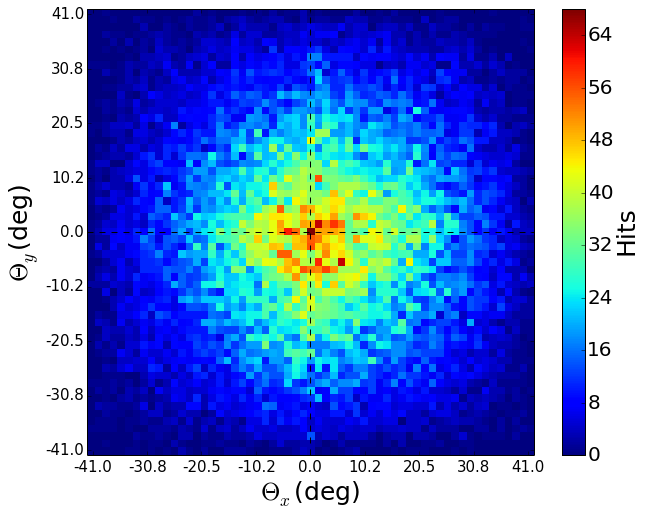

In [20]:
import matplotlib.ticker as ticker

fig = plt.figure(figsize=(35, 8))
ax = fig.add_subplot(131)
ax.set_xlabel("$\Theta_x$(deg)", fontsize = 25)
ax.set_ylabel("$\Theta_y$(deg)", fontsize = 25)

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

extent=(-nBars*theta,nBars*theta,-nBars*theta,nBars*theta)
im = plt.imshow(matrix_ang, interpolation='nearest', extent=extent, origin='lower')

#ax.xaxis.tick_top()


# Color bar
clb = plt.colorbar()
clb.set_label('Hits', fontsize = 25)
clb.ax.tick_params(labelsize = 20)

Nt = Nd
# Set tick labels

labelsx = np.round(np.linspace(-nBars*theta*1.25, nBars*theta*1.25, 11),1)
labelsy = np.round(np.linspace(-nBars*theta*1.25, nBars*theta*1.25, 11),1)

ax.set_xticklabels(labelsx)
ax.set_yticklabels(labelsy)

# center location
plt.axvline(x=0, color='k', lw=1, linestyle='--')
plt.axhline(y=0, color='k', lw=1, linestyle='--')

# Increase tick labels
ax.tick_params(axis='both', which='major', labelsize=15)


#fig.savefig('Fondo.jpg')
#labelsx

print "maximum acceptance = " + str(np.max(matrix_ang))
print "minimum acceptance = " + str(np.min(matrix_ang))

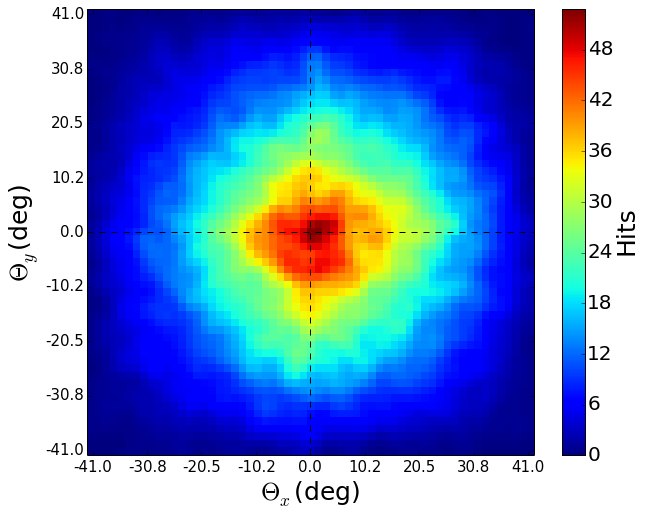

In [21]:
import matplotlib.ticker as ticker

img_ang = ndimage.gaussian_filter(matrix_ang, sigma=(1), order=0)

fig = plt.figure(figsize=(35, 8))
ax = fig.add_subplot(131)
ax.set_xlabel("$\Theta_x$(deg)", fontsize = 25)
ax.set_ylabel("$\Theta_y$(deg)", fontsize = 25)

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

extent=(-nBars*theta,nBars*theta,-nBars*theta,nBars*theta)
im = plt.imshow(img_ang, interpolation='nearest', extent=extent, origin='lower')

#ax.xaxis.tick_top()


# Color bar
clb = plt.colorbar()
clb.set_label('Hits', fontsize = 25)
clb.ax.tick_params(labelsize = 20)

Nt = Nd
# Set tick labels

labelsx = np.round(np.linspace(-nBars*theta*1.25, nBars*theta*1.25, 11),1)
labelsy = np.round(np.linspace(-nBars*theta*1.25, nBars*theta*1.25, 11),1)

ax.set_xticklabels(labelsx)
ax.set_yticklabels(labelsy)

# center location
plt.axvline(x=0, color='k', lw=1, linestyle='--')
plt.axhline(y=0, color='k', lw=1, linestyle='--')

# Increase tick labels
ax.tick_params(axis='both', which='major', labelsize=15)


#fig.savefig('Fondo.jpg')
#labelsx


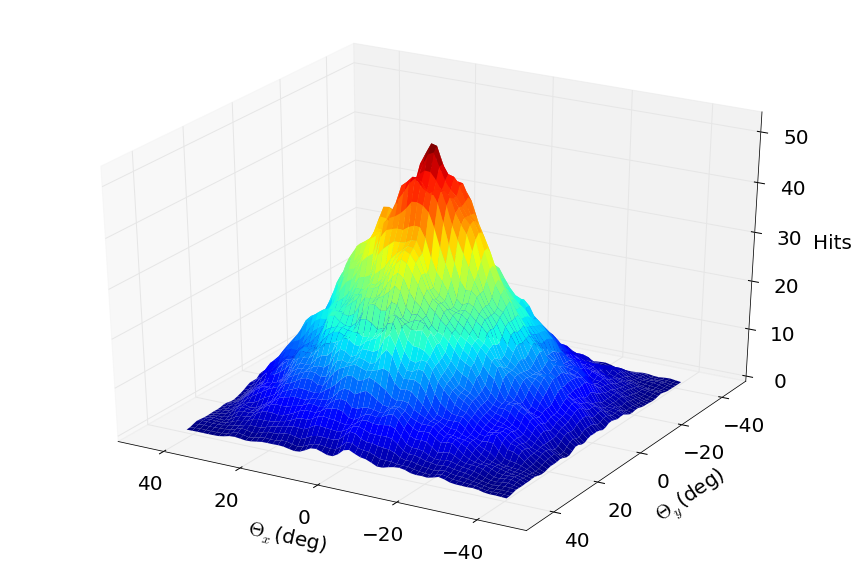

In [11]:
data_array = np.array(img_ang)

fig = plt.figure(figsize=(15, 10))

ax = fig.gca(projection = '3d')
jet = plt.get_cmap('jet')

x = np.linspace(-41, 41, Nd)
y = np.linspace(41, -41, Nd)
X, Y = np.meshgrid(x, y)
Z = data_array

surf = ax.plot_surface(X, Y, Z, rstride = 1, cstride = 1, cmap = jet, linewidth = 0)
ax.set_zlim3d(0, Z.max())
ax.set_xlabel("$\Theta_x$(deg)", fontsize = 20)
ax.set_ylabel("$\Theta_y$(deg)", fontsize = 20)
ax.set_zlabel('Hits', fontsize = 20)

# Increase tick labels
ax.tick_params(axis='both', which='major', labelsize=20)

# Axes rotation
ax.view_init(30, 120)

#fig.savefig('Aceptancia3D.eps')

Solid angle calculation

    1. http://tpm.amc.anl.gov/NJZTools/XEDSSolidAngle.html

    2. https://www.earthobservatory.sg/project/muon-tomography-mayon-volcano-philippines-toward-better-understanding-open-vent-systems

    3. Gilbert -- https://link.springer.com/content/pdf/10.5047%2Feps.2009.07.003.pdf

### Data analysis

In [65]:

for i in range (15):
    
    hour = str(i).zfill(2)

    file_Panel_1 = 'MuTe_P1_2019_01_30h' + hour + '.dat'
    file_Panel_2 = 'MuTe_P2_2019_01_30h' + hour + '.dat'
    
    print "Analysing files: " + file_Panel_1 + " " + file_Panel_2

    count = 0
    for line in open(file_Panel_1).xreadlines(  ): count += 1

    print ("Number of lines P1: ") + str(count)

    count = 0
    for line in open(file_Panel_2).xreadlines(  ): count += 1

    print ("Number of lines P2: ") + str(count)
    
    # Init time determination
    
    
    with open(file_Panel_1) as f:
        i = 0;
        for line in f:
        
            if line[0] == '#':
                if line[2] == 's':
                    init_Time1 = int(line[4:15])
                    L1 = i
                    print "Time P1 : " + str(init_Time1) + " Line : " + str(L1)
                    break
            i+= 1
                
    with open(file_Panel_2) as f:
        i = 0
        for line in f:
            if line[0] == '#':
                if line[2] == 's':
                    init_Time2 = int(line[4:15])
                    L2 = i
                    print "Time P2 : " + str(init_Time2) + " Line : " + str(L2)
                    break
            i += 1

    # Tree data creation
    
    with open(file_Panel_1) as P1:
    
        p1_Dic={}
        array = []
        for line in P1:

            if line[0] != '#':
                array.append(line)


            if line[0] == '#':
                if line[2] == 's':
                    address = line[4:14]
                    p1_Dic[address] = array
                    array = []


    with open(file_Panel_2) as P2:

        p2_Dic={}
        array = []
        for line in P2:

            if line[0] != '#':
                array.append(line)

            if line[0] == '#':
                if line[2] == 's':
                    address = line[4:14]
                    p2_Dic[address] = array
                    array = []

    # Coincidence file creation
    
    nevents_P1 = len(p1_Dic)
    nevents_P2 = len(p2_Dic)

    file = open("coincidence_MD.dat", 'a')

    window = 400
    match_counter = 0

    for i in range(3600):
        i+=1
        address_P1 = str(init_Time1 + i)
        address_P2 = str(init_Time1 + i + 2)    # P2 time matching
        if p1_Dic.get(address_P1) != None:
                if p2_Dic.get(address_P2) != None:
                    #print "Addresses: " + address_P1 + " " + address_P2
                    p1_mat = p1_Dic[address_P1]
                    p2_mat = p2_Dic[address_P2]
                    match(file, address_P1, p1_mat, p2_mat, window)
                    match_counter += 1

    file.close() 

    print "Seconds matched = " + str(match_counter) + "\n"


Analysing files: MuTe_P1_2019_01_30h00.dat MuTe_P2_2019_01_30h00.dat
Number of lines P1: 150747
Number of lines P2: 146300
Time P1 : 1548806401 Line : 51
Time P2 : 1548806401 Line : 78
Seconds matched = 3300

Analysing files: MuTe_P1_2019_01_30h01.dat MuTe_P2_2019_01_30h01.dat
Number of lines P1: 144650
Number of lines P2: 138694
Time P1 : 1548810001 Line : 52
Time P2 : 1548810001 Line : 53
Seconds matched = 3156

Analysing files: MuTe_P1_2019_01_30h02.dat MuTe_P2_2019_01_30h02.dat
Number of lines P1: 151713
Number of lines P2: 149066
Time P1 : 1548813601 Line : 56
Time P2 : 1548813601 Line : 90
Seconds matched = 3246

Analysing files: MuTe_P1_2019_01_30h03.dat MuTe_P2_2019_01_30h03.dat
Number of lines P1: 141301
Number of lines P2: 137933
Time P1 : 1548817201 Line : 55
Time P2 : 1548817201 Line : 57
Seconds matched = 3132

Analysing files: MuTe_P1_2019_01_30h04.dat MuTe_P2_2019_01_30h04.dat
Number of lines P1: 141483
Number of lines P2: 137160
Time P1 : 1548820801 Line : 47
Time P2 : 

### Panel attenuation

In [13]:
event_SP = []

for i in range (15):
    
    hour = str(i).zfill(2)
    
    file = 'MuTe_P2_2019_01_30h' + hour + '.dat'
    print file
    
    data = np.loadtxt(file,'string', comments='#')
    N = len(data)
    print ('Pulsos = ' + str(N))
    
    # Extract the events from the data
    

    for i in range(N):

        x=(" ".join(data[i][4]))
        lin=map(int ,x.split(' '))
        if len(lin) == 64:
            event_SP.append(lin)

event_SP = np.array(event_SP)

print "Total events = " + str(len(event_SP))

MuTe_P2_2019_01_30h00.dat
Pulsos = 139251
MuTe_P2_2019_01_30h01.dat
Pulsos = 131857
MuTe_P2_2019_01_30h02.dat
Pulsos = 142063
MuTe_P2_2019_01_30h03.dat
Pulsos = 130964
MuTe_P2_2019_01_30h04.dat
Pulsos = 130194
MuTe_P2_2019_01_30h05.dat
Pulsos = 152306
MuTe_P2_2019_01_30h06.dat
Pulsos = 142691
MuTe_P2_2019_01_30h07.dat
Pulsos = 144711
MuTe_P2_2019_01_30h08.dat
Pulsos = 140945
MuTe_P2_2019_01_30h09.dat
Pulsos = 144471
MuTe_P2_2019_01_30h10.dat
Pulsos = 150322
MuTe_P2_2019_01_30h11.dat
Pulsos = 139694
MuTe_P2_2019_01_30h12.dat
Pulsos = 139542
MuTe_P2_2019_01_30h13.dat
Pulsos = 144147
MuTe_P2_2019_01_30h14.dat
Pulsos = 142601
Total events = 2115759


In [3]:
hist = np.sum(event_SP, axis=0)
chs = np.linspace(0, 63, num=64)

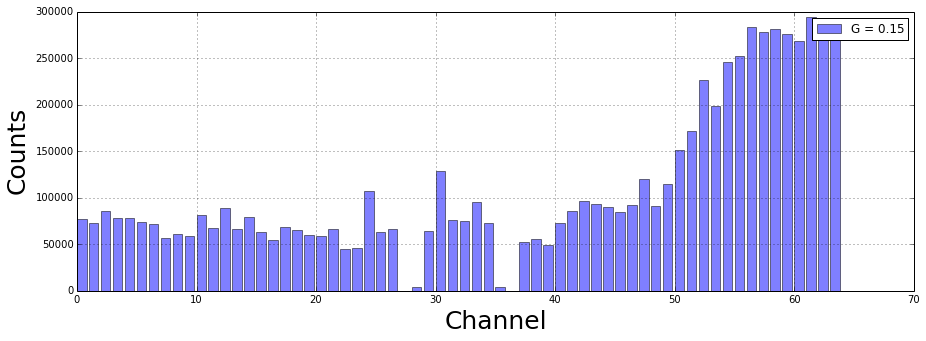

In [4]:
fig = plt.figure(figsize=(15, 5))
plt.bar(chs, hist, alpha=0.5)
plt.xlabel('Channel', fontsize = 25)
plt.ylabel('Counts', fontsize = 25)
plt.legend(["G = 0.15", "Calibrated"])
plt.grid()

Numero de eventos = 365686
SNR = 17.2839156066


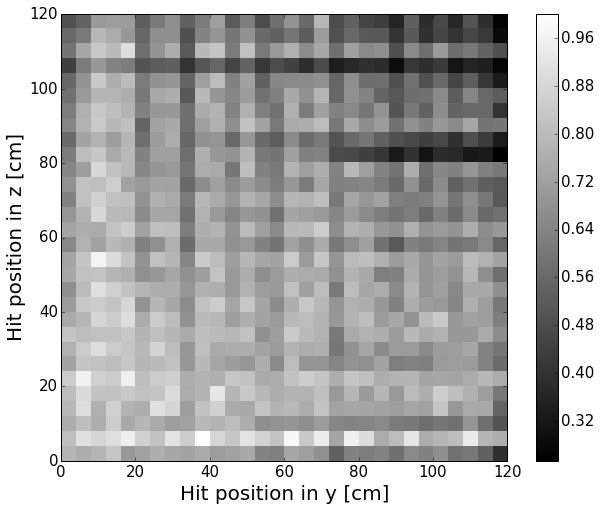

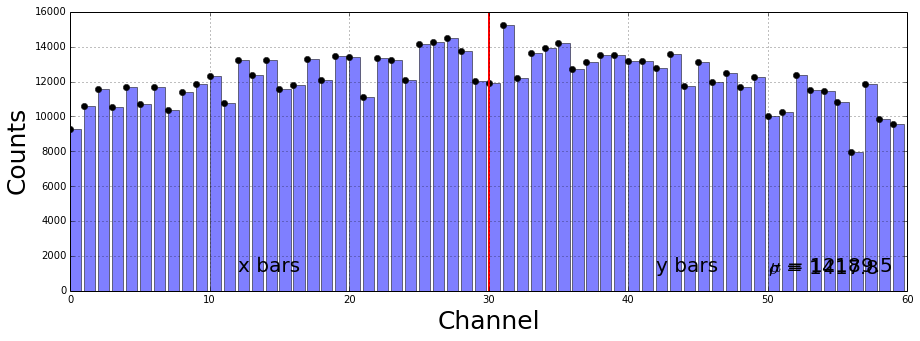

In [19]:
mat = pixel_map_gray(event_SP)

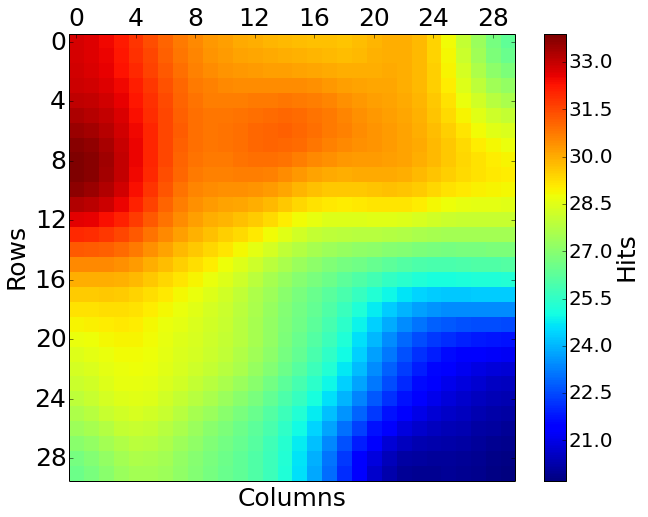

In [95]:
img = ndimage.gaussian_filter(mat, sigma=(3), order=0)

fig = plt.figure(figsize=(35, 8))
ax = fig.add_subplot(131)

plt.imshow(img, interpolation='nearest')
ax.set_xlabel('Columns', fontsize = 25)
ax.set_ylabel('Rows', fontsize = 25)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.invert_yaxis()
ax.invert_yaxis()
ax.xaxis.tick_top()

# Increase tick labels
ax.tick_params(axis='both', which='major', labelsize=25)

# Color bar
clb = plt.colorbar()
clb.set_label('Hits', fontsize = 25)
clb.ax.tick_params(labelsize = 20)

plt.show()

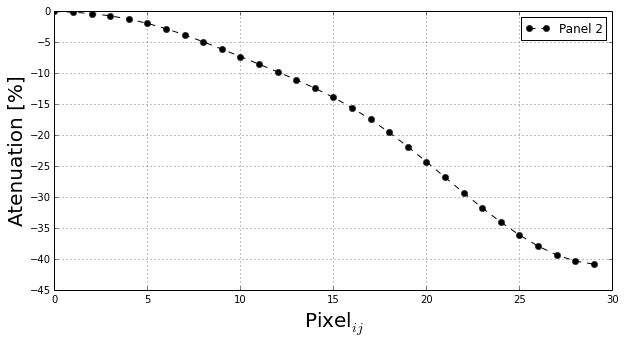

Atenuation percentage = 40.76 


In [40]:
diag = np.diagonal(img)

fig = plt.figure(figsize=(10, 5))
plt.plot((diag/np.max(diag)-1)*100, '--ok')
plt.xlabel("Pixel$_{ij}$", fontsize = 20)
plt.ylabel("Atenuation [%]", fontsize = 20)
plt.legend(["Panel 2"], loc=1)
plt.grid()
plt.show()

print ("Atenuation percentage = %.2f " % ((np.max(diag) - np.min(diag))*100/np.max(diag)))

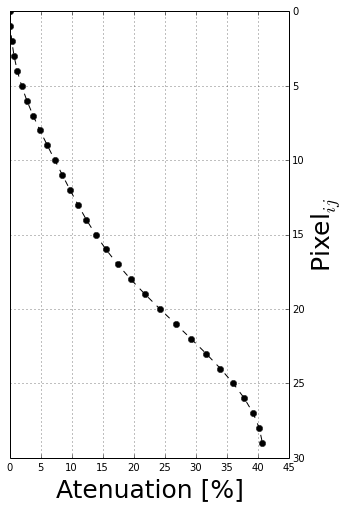

Atenuation percentage = 40.76 


In [87]:
diag = np.diagonal(img)
pixel = np.linspace(0,29,30)

data_diag = np.diagonal(mat)

fig = plt.figure(figsize=(5, 8))
ax = fig.add_subplot(111)
plt.plot(np.abs((diag/np.max(diag)-1))*100, pixel, '--ok')
#plt.plot(np.abs((data_diag/np.max(diag)-1))*100, pixel, 'ok')
plt.xlabel("Atenuation [%]", fontsize = 25)
plt.ylabel("Pixel$_{ij}$", fontsize = 25)

ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
ax.set_ylim(ax.get_ylim()[::-1])
#ax.tick_params(axis='both', which='major', labelsize=15)

plt.grid()
plt.show()

print ("Atenuation percentage = %.2f " % ((np.max(diag) - np.min(diag))*100/np.max(diag)))

### Solid angle calculation

In [5]:
nBars = 30
d = 4       # 4 Pixel size
D = 134.0  # 134 Panel separation


A = d**2    #  Pixel area
d_Omega =  A/(D**2)

theta = int(np.rad2deg(np.arctan(d*nBars/D)))/float(nBars)

Nd = (2*nBars-1)    # Number of trajectories
C = nBars-1         # Shiffting index

r = np.zeros((Nd,Nd))

matrix_P1 = np.zeros((nBars, nBars))
matrix_P2 = np.ones((nBars, nBars))

for i in range(nBars):
    for j in range(nBars):
        for k in range(nBars):
            for l in range(nBars):

                h = k-i
                b = l-j
                ik = np.abs(k-i)
                jl = np.abs(l-j)

                E = np.sqrt((ik*d)**2 + (jl*d)**2)
                r[h+C,b+C]= np.sqrt(D**2 + E**2)

In [6]:
solid_Ang = A/((r/2)**2)

Angular aperture = 82.0 deg
Angular aperture = 1.46 rad
Angular resolution = 59.72 mrad


/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


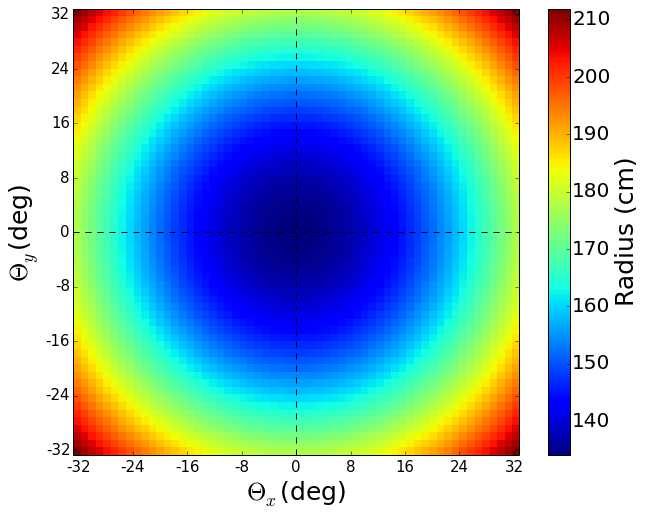

In [7]:
fig = plt.figure(figsize=(35, 8))
ax = fig.add_subplot(131)
ax.set_xlabel("$\Theta_x$(deg)", fontsize = 25)
ax.set_ylabel("$\Theta_y$(deg)", fontsize = 25)

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

extent=(-nBars*theta,nBars*theta,-nBars*theta,nBars*theta)
im = plt.imshow(r, interpolation='nearest', extent=extent, origin='lower')

#ax.xaxis.tick_top()


# Color bar
clb = plt.colorbar()
clb.set_label('Radius (cm)', fontsize = 25)
clb.ax.tick_params(labelsize = 20)

Nt = Nd
# Set tick labels

labelsx = np.round(np.linspace(-nBars*theta, nBars*theta, 11),1)
labelsy = np.round(np.linspace(-nBars*theta, nBars*theta, 11),1)
ax.set_xticklabels(labelsx.astype(int))
ax.set_yticklabels(labelsy.astype(int))

# center location
plt.axvline(x=0, color='k', lw=1, linestyle='--')
plt.axhline(y=0, color='k', lw=1, linestyle='--')


# Increase tick labels
ax.tick_params(axis='both', which='major', labelsize=15)

delta_theta = 2*np.tan(d/D)
                       
print "Angular aperture = " + str(2*nBars*theta) + " deg"
print "Angular aperture = " + str(np.round(2*np.arctan(nBars*d/D),2)) + " rad"
print "Angular resolution = " + str(np.round(1000*delta_theta,2)) + " mrad"

### Spatial resolution on the volcano surface

In [8]:
L = 1000 # distance from volcano [m]
delta_x = L*np.tan(delta_theta)
print "Spatial resolution on the volcano = " + str(np.round(delta_x,2))

Spatial resolution on the volcano = 59.79


maximum solid angle = 3.564268211182892
minimum solid angle = 1.4264063475082462


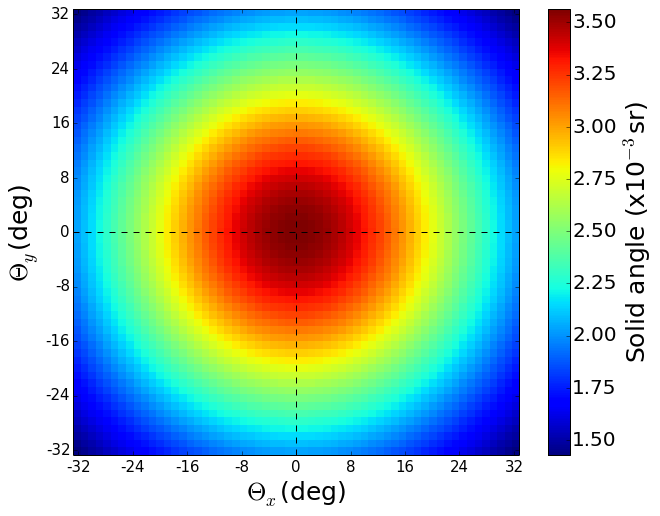

In [10]:

fig = plt.figure(figsize=(35, 8))
ax = fig.add_subplot(131)
ax.set_xlabel("$\Theta_x$(deg)", fontsize = 25)
ax.set_ylabel("$\Theta_y$(deg)", fontsize = 25)

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

extent=(-nBars*theta,nBars*theta,-nBars*theta,nBars*theta)
im = plt.imshow(solid_Ang*1000, interpolation='nearest', extent=extent, origin='lower')

#ax.xaxis.tick_top()

# Color bar
clb = plt.colorbar()
clb.set_label('Solid angle (x10$^{-3}$sr)', fontsize = 25)
clb.ax.tick_params(labelsize = 20)


Nt = Nd
# Set tick labels

labelsx = np.round(np.linspace(-nBars*theta, nBars*theta, 11),1)
labelsy = np.round(np.linspace(-nBars*theta, nBars*theta, 11),1)

ax.set_xticklabels(labelsx.astype(int))
ax.set_yticklabels(labelsy.astype(int))

# center location
plt.axvline(x=0, color='k', lw=1, linestyle='--')
plt.axhline(y=0, color='k', lw=1, linestyle='--')


# Increase tick labels
ax.tick_params(axis='both', which='major', labelsize=15)

print "maximum solid angle = " + str(np.max(solid_Ang*1000))
print "minimum solid angle = " + str(np.min(solid_Ang*1000))

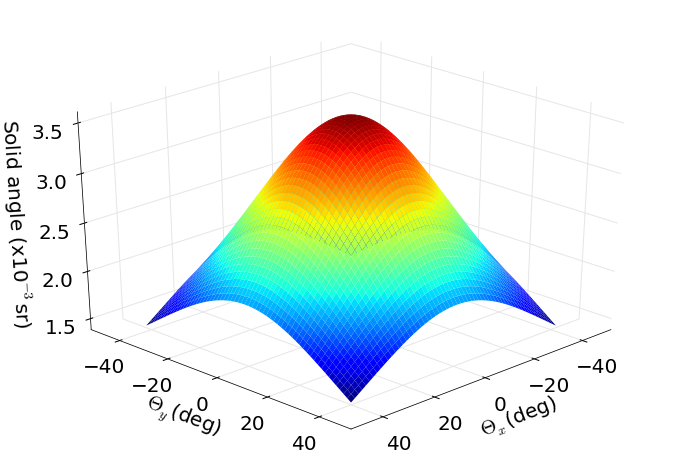

In [11]:
data_array = np.array(solid_Ang)

fig = plt.figure(figsize=(12, 8))

ax = fig.gca(projection = '3d')
jet = plt.get_cmap('jet')

x = np.linspace(-41, 41, Nd)
y = np.linspace(41, -41, Nd)
X, Y = np.meshgrid(x, y)
Z = data_array

surf = ax.plot_surface(X, Y, Z*1000, rstride = 1, cstride = 1, cmap = jet, linewidth = 0)
ax.set_zlim3d(np.min(Z*1000), Z.max()*1000)
ax.set_xlabel("$\Theta_x$(deg)", fontsize = 20)
ax.set_ylabel("$\Theta_y$(deg)", fontsize = 20)
ax.set_zlabel('Solid angle (x10$^{-3}$sr)', fontsize = 20)

ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

# Increase tick labels
ax.tick_params(axis='both', which='major', labelsize=20)

# Axes rotation
ax.view_init(30, 45)

### Acceptance  calculation

The number of muons detected by the telescope for a given direction $r_{m,n}$ reads

$$N(r_{m,n}, \Delta T)=I(r_{m,n}) \times \Delta T \times \mathcal{T}(r_{m,n})  $$

where $I$ is the flux of muons given in $cm^{-2}sr^{-1}s^{-1}$, $\Delta T$ is the duration of the measured period, and $\mathcal{T}$ is the telescope acceptance experessed in $cm^2 sr$. The acceptance may be written as,


$$\mathcal{T}(r_{m,n}) = S(r_{m,n}) \times \delta \Omega (r_{m,n})$$

where $S$ is the detection surface and $\delta \Omega$ is the angular aperture.

In [12]:

Nd = (2*nBars-1)    # Number of trajectories
C = nBars-1        # Shiffting index

n_Pixel = np.zeros((Nd,Nd))

matrix_P1 = np.zeros((nBars, nBars))
matrix_P2 = np.ones((nBars, nBars))

for i in range(nBars):
    for j in range(nBars):
        matrix_P1[i,j] = 1
        for k in range(nBars):
            for l in range(nBars):

                if matrix_P1[i,j]== 1:
                    iP1 = i
                    jP1 = j
                if matrix_P2[k,l]== 1:
                    iP2 = k
                    jP2 = l

                h = iP1 - iP2
                b = jP1 - jP2

                n_Pixel[h+C,b+C]= n_Pixel[h+C,b+C] + 1
                
print "Maximum number of pixel = " + str(np.max(n_Pixel))

Maximum number of pixel = 900.0


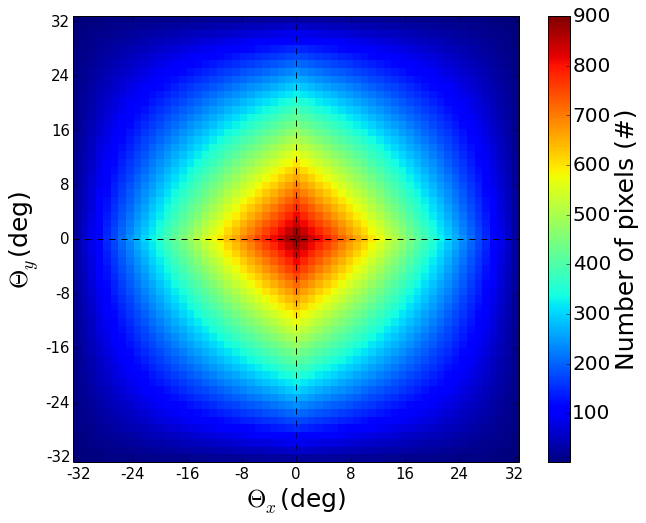

In [13]:
fig = plt.figure(figsize=(35, 8))
ax = fig.add_subplot(131)
ax.set_xlabel("$\Theta_x$(deg)", fontsize = 25)
ax.set_ylabel("$\Theta_y$(deg)", fontsize = 25)

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

extent=(-nBars*theta,nBars*theta,-nBars*theta,nBars*theta)
im = plt.imshow(n_Pixel, interpolation='nearest', extent=extent, origin='lower')

#ax.xaxis.tick_top()


# Color bar
clb = plt.colorbar()
clb.set_label('Number of pixels (#)', fontsize = 25)
clb.ax.tick_params(labelsize = 20)

Nt = Nd
# Set tick labels

labelsx = np.round(np.linspace(-nBars*theta, nBars*theta, 11),1)
labelsy = np.round(np.linspace(-nBars*theta, nBars*theta, 11),1)

ax.set_xticklabels(labelsx.astype(int))
ax.set_yticklabels(labelsy.astype(int))

# center location
plt.axvline(x=0, color='k', lw=1, linestyle='--')
plt.axhline(y=0, color='k', lw=1, linestyle='--')


# Increase tick labels
ax.tick_params(axis='both', which='major', labelsize=15)


In [14]:
acceptance = np.zeros((Nd,Nd))

for i in range(Nd):
    for j in range(Nd):
        
        acceptance[i,j] = n_Pixel[i,j]*solid_Ang[i,j]*A/4

maximum acceptance = 12.83
minimum acceptance = 0.006


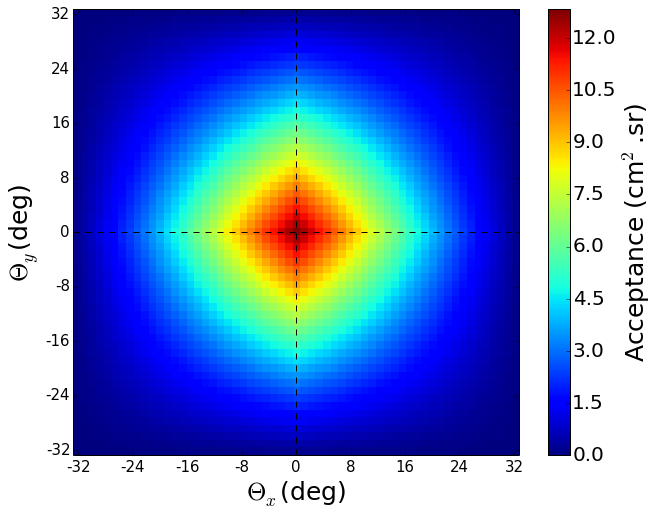

In [15]:

fig = plt.figure(figsize=(35, 8))
ax = fig.add_subplot(131)
ax.set_xlabel("$\Theta_x$(deg)", fontsize = 25)
ax.set_ylabel("$\Theta_y$(deg)", fontsize = 25)

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

extent=(-nBars*theta,nBars*theta,-nBars*theta,nBars*theta)
im = plt.imshow(acceptance, interpolation='nearest', extent=extent, origin='lower')

#ax.xaxis.tick_top()


# Color bar
clb = plt.colorbar()
clb.set_label('Acceptance (cm$^2$.sr)', fontsize = 25)
clb.ax.tick_params(labelsize = 20)

Nt = Nd
# Set tick labels

labelsx = np.round(np.linspace(-nBars*theta, nBars*theta, 11),1)
labelsy = np.round(np.linspace(-nBars*theta, nBars*theta, 11),1)

ax.set_xticklabels(labelsx.astype(int))
ax.set_yticklabels(labelsy.astype(int))

# center location
plt.axvline(x=0, color='k', lw=1, linestyle='--')
plt.axhline(y=0, color='k', lw=1, linestyle='--')


# Increase tick labels
ax.tick_params(axis='both', which='major', labelsize=15)

print "maximum acceptance = " + str(np.round(np.max(acceptance),2))
print "minimum acceptance = " + str(np.round(np.min(acceptance),3))

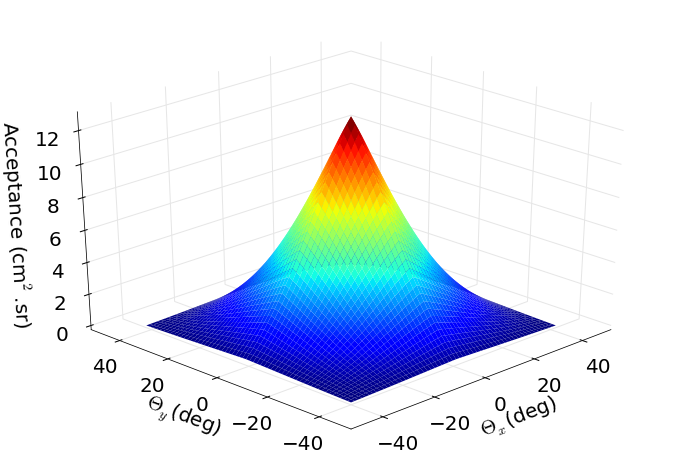

In [16]:
data_array = np.array(acceptance)

fig = plt.figure(figsize=(12, 8))

ax = fig.gca(projection = '3d')
jet = plt.get_cmap('jet')

x = np.linspace(-41, 41, Nd)
y = np.linspace(41, -41, Nd)
X, Y = np.meshgrid(x, y)
Z = data_array

surf = ax.plot_surface(X, Y, Z, rstride = 1, cstride = 1, cmap = jet, linewidth = 0)
ax.set_zlim3d(0, Z.max())
ax.set_xlabel("$\Theta_x$(deg)", fontsize = 20)
ax.set_ylabel("$\Theta_y$(deg)", fontsize = 20)
ax.set_zlabel('Acceptance (cm$^2$.sr)', fontsize = 20)

ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

# Increase tick labels
ax.tick_params(axis='both', which='major', labelsize=20)

# Axes rotation
ax.view_init(30, 225)

### Flux estimation 

Having the number $N$ of muons detected for each direction $r_{m,n}$ during a period $\Delta T$, the integrated flux $I$ reads,

$$I(r_{m,n}) = \frac{N(r_{m,n})}{\Delta T \times \mathcal{T}(r_{m,n})}  (cm^{-2}sr^{-1}s^{-1}) $$

In [22]:
horas = 15.0
delta_T = horas*3600

Nd = (2*nBars-1)    # Number of trajectories

I_flux = np.zeros((Nd,Nd))

for i in range(Nd):
    for j in range(Nd):
        
        I_flux[i,j] = matrix_ang[i,j]/(delta_T*acceptance[i,j])
        
        if I_flux[i,j] > 0.00012: #0.0002
             I_flux[i,j] = 0

#np.unravel_index(np.argmax(acceptance), acceptance.shape)
np.max(I_flux)

0.0001198640046296296

Maximum rate : 0.0001198640046296296
Integrated rate : 0.19547390830184935


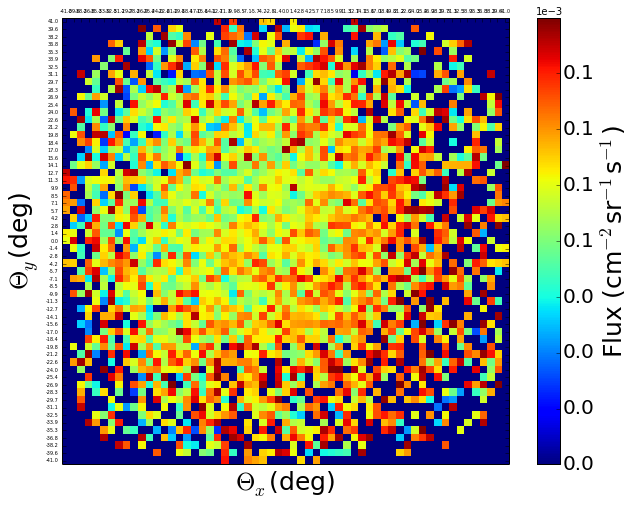

In [23]:
fig = plt.figure(figsize=(35, 8))
ax = fig.add_subplot(131)
ax.set_xlabel("$\Theta_x$(deg)", fontsize = 25)
ax.set_ylabel("$\Theta_y$(deg)", fontsize = 25)

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

im = plt.imshow(I_flux, interpolation='nearest', origin='low')

ax.xaxis.tick_top()

# Color bar
clb = plt.colorbar(format=OOMFormatter(-3, mathText=False))
clb.set_label('Flux (cm$^{-2}$sr$^{-1}$s$^{-1}$)', fontsize = 25)
clb.ax.tick_params(labelsize = 20)

Nt = Nd
# Set tick labels
labelsx = np.round(np.linspace(-nBars*theta, nBars*theta, Nt),1)
labelsy = np.round(np.linspace(-nBars*theta, nBars*theta, Nt),1)
ax.set_xticks(np.arange(Nt))
ax.set_yticks(np.arange(Nt))
ax.set_xticklabels(labelsx)
ax.set_yticklabels(labelsy)


# Increase tick labels
ax.tick_params(axis='both', which='major', labelsize=5)

#fig.savefig('Fondo.jpg')
#labelsx

print "Maximum rate : " + str(np.max(I_flux))
print "Integrated rate : " + str(np.sum(I_flux))

Maximum rate : 9.719797932760394e-05
Integrated rate : 0.19547390830184944


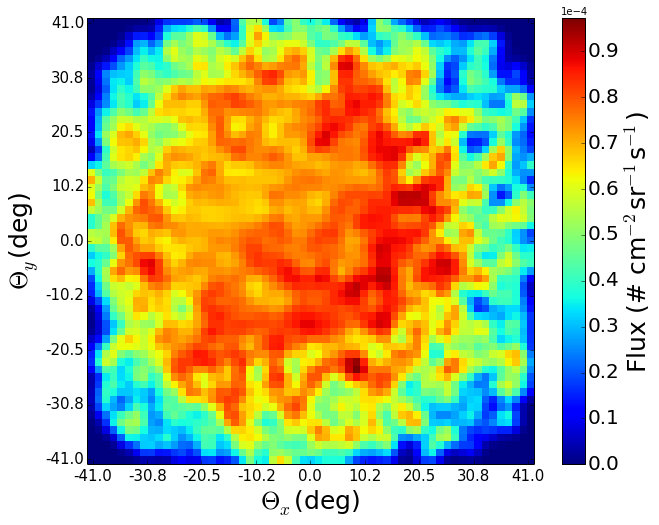

In [24]:
img_flux = ndimage.gaussian_filter(I_flux, sigma=(1), order=0)

fig = plt.figure(figsize=(35, 8))
ax = fig.add_subplot(131)
ax.set_xlabel("$\Theta_x$(deg)", fontsize = 25)
ax.set_ylabel("$\Theta_y$(deg)", fontsize = 25)

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

extent=(-nBars*theta,nBars*theta,-nBars*theta,nBars*theta)
im = plt.imshow(img_flux, interpolation='nearest', extent=extent, origin='lower')

#ax.xaxis.tick_top()

# Color bar

clb = plt.colorbar(format=OOMFormatter(-4, mathText=False))
clb.set_label('Flux (# cm$^{-2}$sr$^{-1}$s$^{-1}$)', fontsize = 25)
clb.ax.tick_params(labelsize = 20)

Nt = Nd
# Set tick labels

labelsx = np.round(np.linspace(-nBars*theta*1.25, nBars*theta*1.25, 11),1)
labelsy = np.round(np.linspace(-nBars*theta*1.25, nBars*theta*1.25, 11),1)

ax.set_xticklabels(labelsx)
ax.set_yticklabels(labelsy)


# Increase tick labels
ax.tick_params(axis='both', which='major', labelsize=15)

print "Maximum rate : " + str(np.max(img_flux))
print "Integrated rate : " + str(np.sum(img_flux))

### Flux scaling

Maximum rate : 0.010973651866086485
Integrated rate : 22.0690042472788


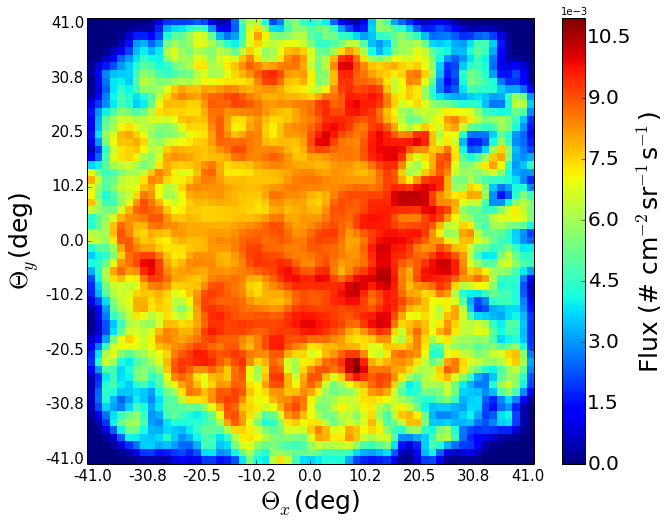

In [25]:
R = 112.9

img_flux = ndimage.gaussian_filter(I_flux, sigma=(1), order=0)

fig = plt.figure(figsize=(35, 8))
ax = fig.add_subplot(131)
ax.set_xlabel("$\Theta_x$(deg)", fontsize = 25)
ax.set_ylabel("$\Theta_y$(deg)", fontsize = 25)

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

extent=(-nBars*theta,nBars*theta,-nBars*theta,nBars*theta)
im = plt.imshow(img_flux*R, interpolation='nearest', extent=extent, origin='lower')

#ax.xaxis.tick_top()


# Color bar

clb = plt.colorbar(format=OOMFormatter(-3, mathText=False))
clb.set_label('Flux (# cm$^{-2}$sr$^{-1}$s$^{-1}$)', fontsize = 25)
clb.ax.tick_params(labelsize = 20)

Nt = Nd
# Set tick labels

labelsx = np.round(np.linspace(-nBars*theta*1.25, nBars*theta*1.25, 11),1)
labelsy = np.round(np.linspace(-nBars*theta*1.25, nBars*theta*1.25, 11),1)

ax.set_xticklabels(labelsx)
ax.set_yticklabels(labelsy)

# Increase tick labels
ax.tick_params(axis='both', which='major', labelsize=15)

print "Maximum rate : " + str(np.max(img_flux*R))
print "Integrated rate : " + str(np.sum(img_flux*R))

### Open Sky flux

In [63]:
data_profile = img_flux[29,:]*R
angle = np.round(np.linspace(-nBars*theta, nBars*theta, 59),1)

cenith =  np.round(np.linspace(-90, 90, 180),1)

scale = np.max(data_profile)
model = 0.009*np.power(np.cos(angle*np.pi/180.0),2)

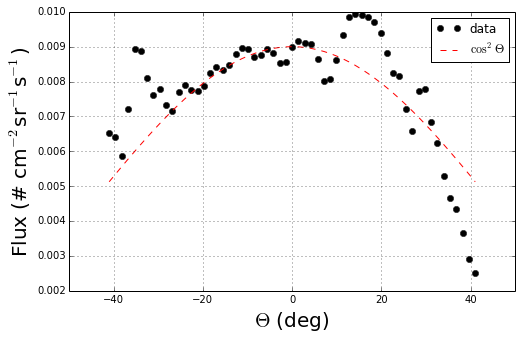

In [69]:
fig = plt.figure(figsize=(8, 5))
plt.plot(angle, data_profile, 'ok')
plt.plot(angle, model, '--r')
plt.xlabel("$\Theta$ (deg)", fontsize = 20)
plt.ylabel('Flux (# cm$^{-2}$sr$^{-1}$s$^{-1}$)', fontsize = 20)
plt.legend(["data", "$\cos^2 \Theta $"], loc=1)
plt.grid()
plt.show()

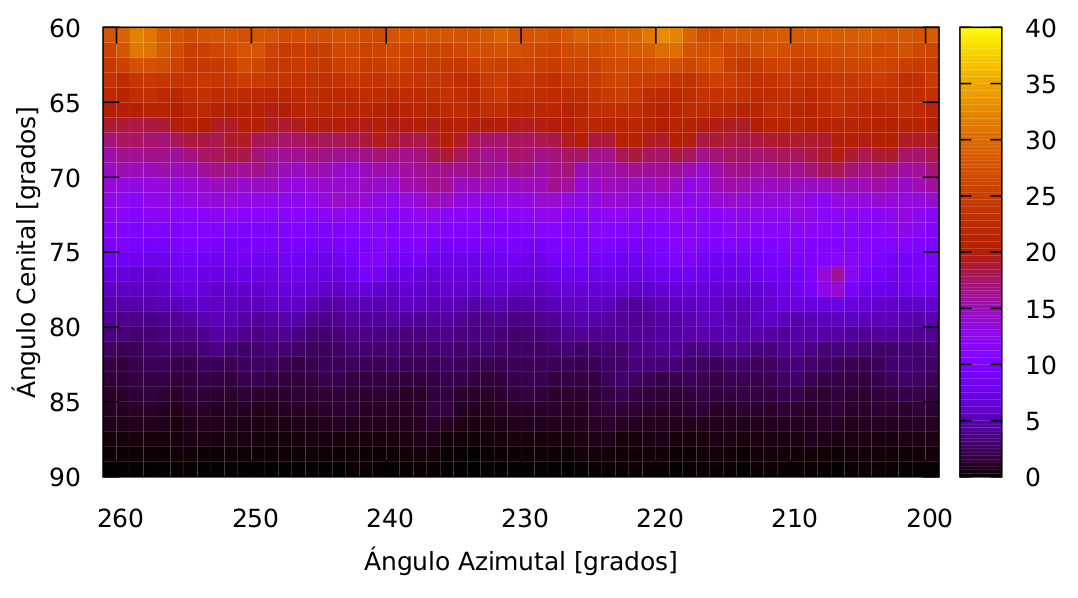

In [73]:
Image(filename='Figures/Flux_cenith.png', width = 600)

In [129]:
open_sky = np.zeros((Nd,Nd))
cen_mat = np.zeros((Nd,Nd))

up_lim = 64 # cenith angle
low_lim = 90

cen_angle =  np.round(np.linspace(up_lim , low_lim, Nd/2),1)

for i in range (Nd/2):
    cen_mat [i,:] = cen_angle[i]*np.ones(Nd)
    open_sky [i,:] = 0.009*np.power(np.cos(cen_angle[i]*np.pi/180.0),2)*np.ones(Nd)


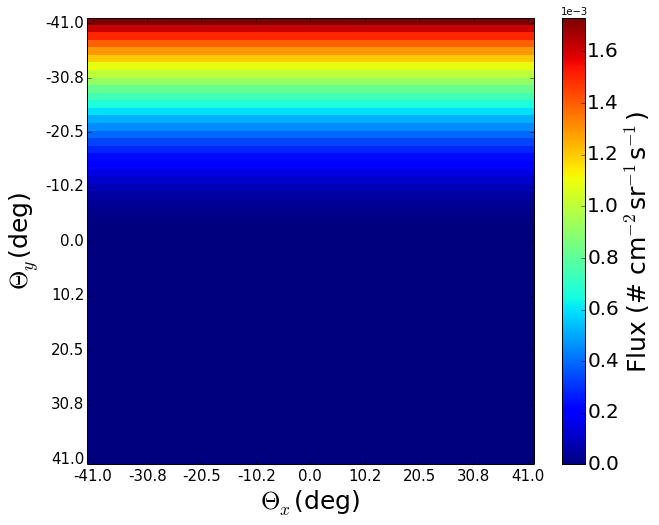

In [130]:
fig = plt.figure(figsize=(35, 8))
ax = fig.add_subplot(131)
ax.set_xlabel("$\Theta_x$(deg)", fontsize = 25)
ax.set_ylabel("$\Theta_y$(deg)", fontsize = 25)

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

extent=(-nBars*theta,nBars*theta,-nBars*theta,nBars*theta)
im = plt.imshow(open_sky, interpolation='nearest', extent=extent, origin='lower')

#ax.xaxis.tick_top()
ax.invert_yaxis()

# Color bar

clb = plt.colorbar(format=OOMFormatter(-3, mathText=False))
clb.set_label('Flux (# cm$^{-2}$sr$^{-1}$s$^{-1}$)', fontsize = 25)
clb.ax.tick_params(labelsize = 20)

Nt = Nd
# Set tick labels


labelsx = np.round(np.linspace(-nBars*theta*1.25, nBars*theta*1.25, 11),1)
labelsy = np.round(np.linspace(-nBars*theta*1.25, nBars*theta*1.25, 11),1)

ax.set_xticklabels(labelsx)
ax.set_yticklabels(labelsy)


# Increase tick labels
ax.tick_params(axis='both', which='major', labelsize=15)


In [131]:
# Saving the opensky flux

file_OSflux = open("Open_Sky_Flux_Buc.dat", "w")

for i in range (Nd):
    for j in range (Nd):
        file_OSflux.write(str(np.round(open_sky [i,j],5))) 
        file_OSflux.write("\t")
    file_OSflux.write("\n")
    
file_OSflux.close()

### Panel delay matrix

In [21]:
delay_f = 77 # 77 ps/cm

Delay_M = np.zeros((nBars,nBars))

for i in range(nBars):
    for j in range(nBars):
        
        if i<=j:
            
            Delay_M[i,j] = ((i+1)*4-2) * delay_f
        else:
            Delay_M[i,j] = ((j+1)*4-2) * delay_f

print "Maximum delay = " + str(np.max(Delay_M))

Maximum delay = 9086.0


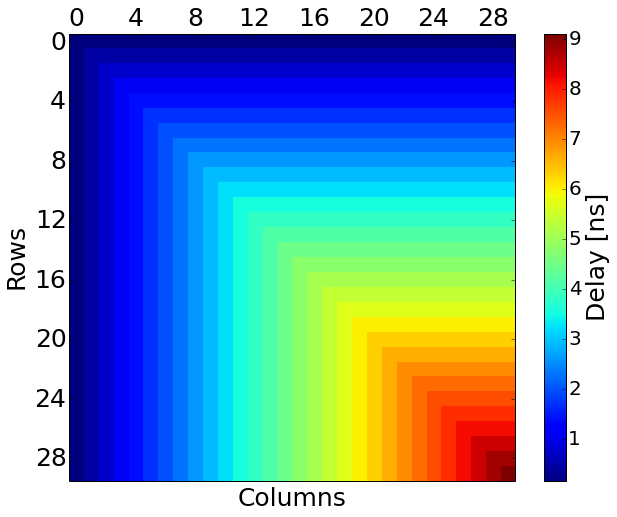

In [25]:
fig = plt.figure(figsize=(35, 8))
ax = fig.add_subplot(131)
ax.set_xlabel('Columns', fontsize = 25)
ax.set_ylabel('Rows', fontsize = 25)

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.invert_yaxis()
im = plt.imshow(Delay_M/1000.0, interpolation='nearest', origin='low')

ax.invert_yaxis()
ax.xaxis.tick_top()

# Color bar
clb = plt.colorbar()
clb.set_label('Delay [ns]', fontsize = 25)
clb.ax.tick_params(labelsize = 20)

# Increase tick labels
ax.tick_params(axis='both', which='major', labelsize=25)